MNISTをニューラルネットワークで解く
================================

## Q1. 実行結果の解釈
このノートブックをそのまま実行して、その結果を解釈し、説明してください

## Q2. 改良
「20190410_Q4_02_MNIST_on_neural_network」を参照してください。



# 結果を可視化するための関数を定義

In [0]:
# 結果を可視化するための関数を定義

import matplotlib.pyplot as plt


def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [0]:
# データのロードと分割

from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

In [25]:
# 学習時間を短くするために訓練データを減らす
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [0]:
# 入力データの前処理
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

In [0]:
# カテゴリデータに変換
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# モデルの定義とコンパイル

In [28]:
# モデルの定義

from keras import layers, models

model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(784,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
# モデルのコンパイル
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),  # 最適化アルゴリズム: RMSProp / 学習率: 0.001
              loss=categorical_crossentropy,# 損失関数: カテゴリカル交差エントロピー
              metrics=["accuracy"])         # 評価指標: 正答率

# モデルの学習

In [30]:
# モデルの学習
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 1000 samples, validate on 15000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 957us/step - loss: 2.0208 - acc: 0.3520 - val_loss: 1.6923 - val_acc: 0.4822
Epoch 2/5
1000/1000 [==============================] - 1s 711us/step - loss: 1.4432 - acc: 0.6240 - val_loss: 1.2856 - val_acc: 0.6383
Epoch 3/5
1000/1000 [==============================] - 1s 743us/step - loss: 1.0561 - acc: 0.7310 - val_loss: 1.0279 - val_acc: 0.6777
Epoch 4/5
1000/1000 [==============================] - 1s 738us/step - loss: 0.8126 - acc: 0.7820 - val_loss: 0.8327 - val_acc: 0.7562
Epoch 5/5
1000/1000 [==============================] - 1s 741us/step - loss: 0.6494 - acc: 0.8310 - val_loss: 0.7348 - val_acc: 0.7737


# 結果の可視化と評価

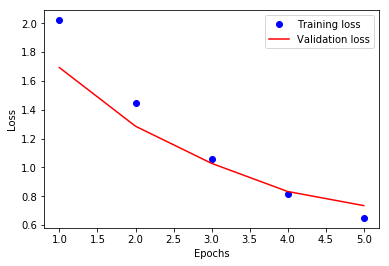

In [31]:
# 損失の可視化
plot_train_val_loss(history)

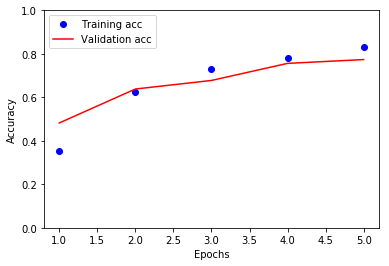

In [32]:
# 正答率の可視化
plot_train_val_acc(history)

In [33]:
# テストデータでの評価
history.model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 47us/step


[0.6912718464374542, 0.7971]

エポック数4.0のときより5.0の方が正答率が下がっている。過学習が発生しているものと思われる。